In [1]:
%pylab inline
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('Desktop/uber-raw-data-apr14.csv')

In [3]:
data.head() # First five rows of the dataset with all the features

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


adding a few columns for analysis

In [7]:
data['Date/Time']=data['Date/Time'].map(pd.to_datetime) # converting the date/time into a readable form 

In [18]:
def dom(dt):
    return dt.day   
data['dayofmonth']=data['Date/Time'].map(dom)

def dom1(dt):
    return dt.weekday()    
data['weekday']=data['Date/Time'].map(dom1)

def dom2(dt):
    return dt.hour
    
data['hour']=data['Date/Time'].map(dom2)

In [19]:
data.tail()

,Date/Time,Lat,Lon,Base,dayofmonth,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


In [20]:
data.head()

,Date/Time,Lat,Lon,Base,dayofmonth,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


Analysis

Text(0, 0.5, 'Frequency')

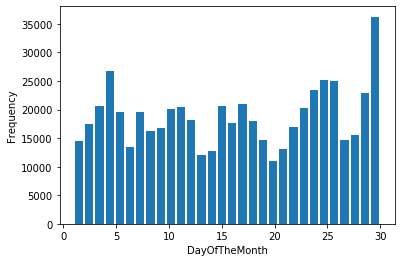

In [23]:
#histogram
hist(data.dayofmonth,bins=30,rwidth=.8)
xlabel('DayOfTheMonth')
ylabel('Frequency')

In [25]:
#Counting frequency for each day
def count_rows(rows):
    return len(rows)
bydate=data.groupby("dayofmonth").apply(count_rows)
bydate


dayofmonth
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

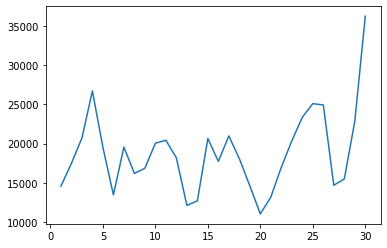

In [26]:
plot(bydate)
#almost the same as the histogram

In [28]:
by_date=bydate.sort_values()
by_date

dayofmonth
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

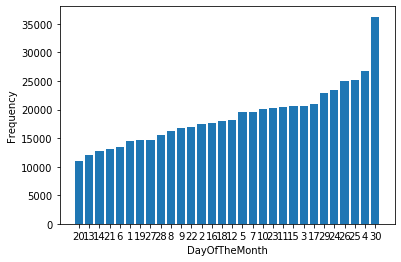

In [34]:
bar(range(1,31),by_date)
xticks(range(1,31),by_date.index)
xlabel('DayOfTheMonth')
ylabel('Frequency')
;

analyse the hour

''

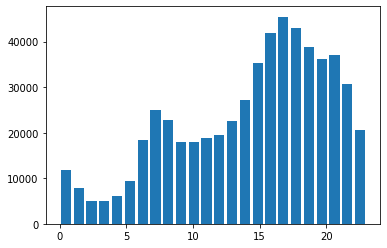

In [40]:
hist(data.hour,bins =24,rwidth=0.8)
;

ANALYSE THE WEEKDAY

''

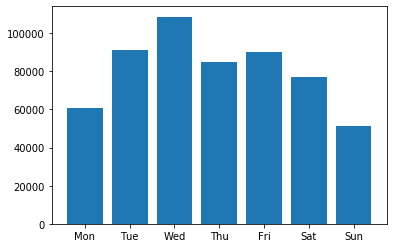

In [44]:
hist(data.weekday,bins=7,rwidth=0.8,range=(-.5,6.5))
xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split(" "))
;


Cross Analysis for hour and week combined

In [59]:
#frequency per day and the hour as well
xx=data.groupby('hour weekday'.split()).apply(count_rows).unstack()
xx


weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


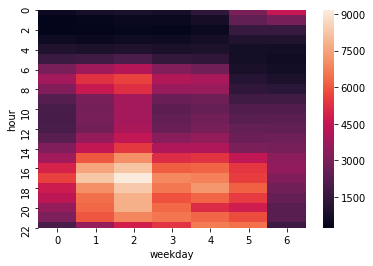

In [60]:
seaborn.heatmap(xx)

Analysis which dont have much meaning

''

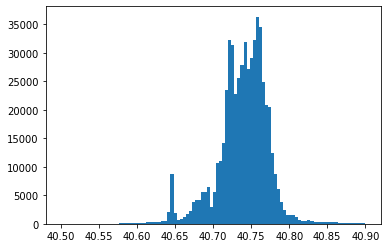

In [65]:
hist(data['Lat'],bins=100,range=(40.5,40.9))
;

''

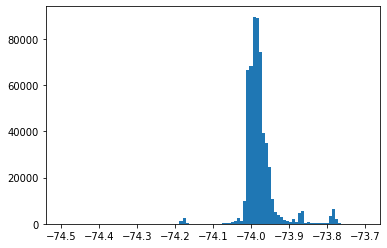

In [70]:
hist(data['Lon'],bins=100,range=(-74.5,-73.7))
;